[*********************100%***********************]  3 of 3 completed


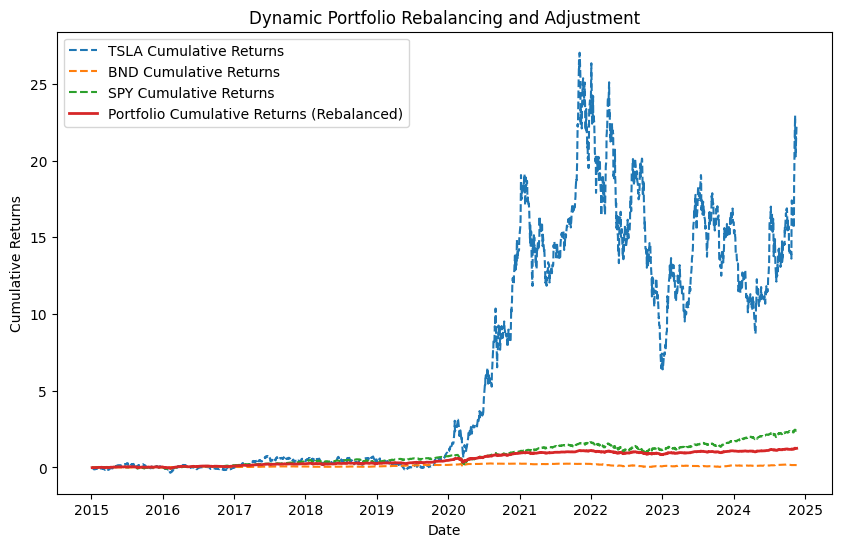

Optimal Portfolio Weights: TSLA: 0.50, BND: 0.36, SPY: 0.14


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Fetch historical data for TSLA, BND, and SPY
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Calculate the expected annual return and volatility (standard deviation) for each asset
annual_returns = returns.mean() * 252  
annual_volatility = returns.std() * np.sqrt(252)

# Portfolio optimization using Sharpe Ratio (Risk-adjusted return)
def portfolio_performance(weights, returns, volatilities):
    # Calculate portfolio return
    portfolio_return = np.sum(weights * annual_returns)
    # Calculate portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    # Calculate Sharpe Ratio 
    sharpe_ratio = portfolio_return / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to minimize Sharpe Ratio (maximize Sharpe)
def minimize_sharpe_ratio(weights, returns):
    return -portfolio_performance(weights, returns, returns.std())[2]  # Negative Sharpe for minimization

# Portfolio rebalancing function
def rebalance_portfolio():
    # Initial portfolio weights (equally weighted)
    initial_weights = np.array([1/3, 1/3, 1/3])  # TSLA, BND, SPY
    
    # Optimize portfolio weights using Sharpe Ratio maximization
    optimal_weights = minimize(minimize_sharpe_ratio, initial_weights, args=(returns,), 
                               method='SLSQP', bounds=((0, 1), (0, 1), (0, 1)),
                               constraints={'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    
    # Return optimal weights
    return optimal_weights.x

# Visualizing portfolio performance
def plot_portfolio_performance():
    # Rebalance the portfolio and get the optimal weights
    optimal_weights = rebalance_portfolio()
    portfolio_returns = (returns.dot(optimal_weights)).cumsum()  # Portfolio cumulative returns

    # Plot portfolio performance
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns['TSLA'], label='TSLA Cumulative Returns', linestyle='--')
    plt.plot(cumulative_returns['BND'], label='BND Cumulative Returns', linestyle='--')
    plt.plot(cumulative_returns['SPY'], label='SPY Cumulative Returns', linestyle='--')
    plt.plot(portfolio_returns, label='Portfolio Cumulative Returns (Rebalanced)', linewidth=2)
    plt.title('Dynamic Portfolio Rebalancing and Adjustment')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='upper left')
    plt.show()

    # Display optimal portfolio weights
    print(f"Optimal Portfolio Weights: TSLA: {optimal_weights[0]:.2f}, BND: {optimal_weights[1]:.2f}, SPY: {optimal_weights[2]:.2f}")

# Perform Rebalancing and Plot Portfolio Performance
plot_portfolio_performance()

